Analyse générale des fichiers

In [88]:
import pandas as pd
import plotly.express as px
from olist.data import Olist
import seaborn as sns
import matplotlib.pyplot as plt


data = Olist().get_data()
list(data.keys())

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [8]:
from olist.seller import Seller

sellers = Seller().get_training_data()

In [9]:
sellers

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,0.000000,1.000000,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,0.000000,1.000000,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,0.000000,1.000000,5.00
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,0.100000,0.500000,4.10
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,0.000000,1.000000,5.00
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,0.000000,0.500000,4.25


Analyse sales

In [ ]:
orders       = data['orders'].copy()
order_items  = data['order_items'].copy()
products     = data['products'].copy()
customers    = data['customers'].copy()
sellers      = data['sellers'].copy()
reviews     = data['order_reviews'].copy()
geolocation = data['geolocation'].copy()
payments    = data['order_payments'].copy()


In [16]:
list(data.keys())

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [22]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
orders.info


<bound method DataFrame.info of                                order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp

sales evolution over time

In [35]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
delivered = orders[orders['order_status'] == 'delivered'][['order_id', 'order_purchase_timestamp']]

In [36]:
sales = order_items.merge(delivered, on='order_id')


In [112]:
# 3. Extraire le mois et calculer le chiffre d'affaires
sales['month'] = sales['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
sales_month = sales.groupby('month', as_index=False)['price'].sum()
sales_month.rename(columns={'price': 'C.A'}, inplace=True)

In [113]:
# 4. Graphe

px.line(sales_month, x='month', y='C.A', title="Évolution du chiffre d'affaires").show()

ventes / catégories de produit

In [43]:
products.info


<bound method DataFrame.info of                              product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  pro

In [53]:
sales_products = (
    order_items
      .merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
      .merge(delivered[['order_id', 'order_purchase_timestamp']], on='order_id', how='inner')
)

In [55]:
sales_products.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,2017-02-04 13:57:51


In [116]:
import plotly.express as px

sales_by_categorie=(
    sales_products
    .groupby("product_category_name", as_index=False)["price"]
    .sum()
    .sort_values("price", ascending=False)
    .head(10)
)

px.bar(
    sales_by_categorie,
    x='product_category_name',
    y='price',
    title='10 plus grosse catégories par chiffre d’affaires',
)

In [85]:
from olist.seller import Seller
seller = Seller()
df_seller = seller.get_training_data()

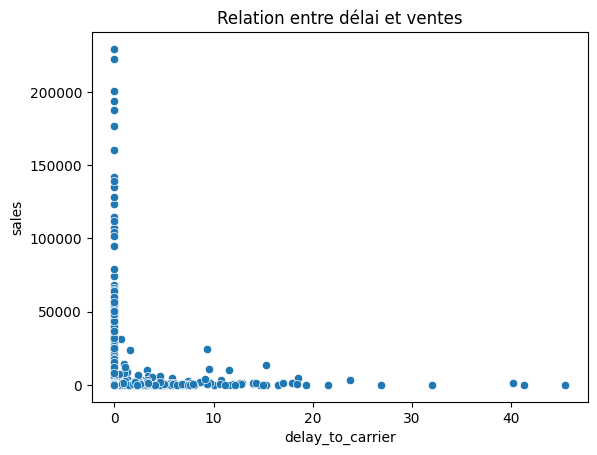

In [90]:
sns.scatterplot(data=df_seller, x='delay_to_carrier', y='sales')
plt.title("Relation entre délai et ventes")
plt.show()

reviews score influence les ventes ?

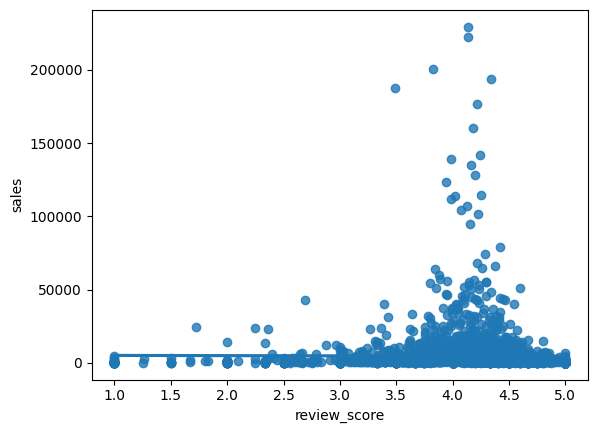

In [97]:
import statsmodels.api as sm

sns.regplot(x='review_score', y='sales', data=df_seller);


Performance vendeurs (est-ce que les vendeurs avec peu de retard et de bonnes notes vendent plus) NON

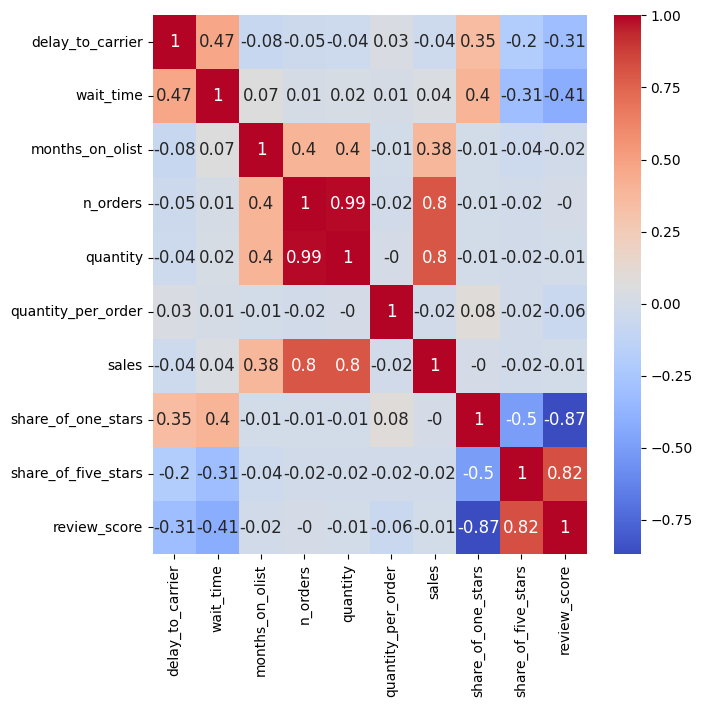

In [98]:
plt.figure(figsize = (7,7))
sns.heatmap(round(df_seller.corr(numeric_only=True), 2),
            cmap="coolwarm", annot=True, annot_kws={"size":12});

Ventes par vendeur

In [117]:
px.histogram(df_seller, x='sales')


In [106]:
px.scatter(df_seller, x='delay_to_carrier', y='sales')


Ventes vs satisfaction

In [107]:
px.scatter(df_seller, x='review_score', y='sales')


In [109]:
px.scatter(df_seller, x='months_on_olist', y='sales')

In [110]:
import statsmodels.api as sm

X = sm.add_constant(df_seller['months_on_olist'])
y = df_seller['sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     491.2
Date:                Mon, 27 Oct 2025   Prob (F-statistic):          7.77e-101
Time:                        16:06:57   Log-Likelihood:                -32348.
No. Observations:                2967   AIC:                         6.470e+04
Df Residuals:                    2965   BIC:                         6.471e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -808.7173    342.237     

Étudier les délais
wait_time ~ distance_seller_customer + delay_to_carrier
